This notebook is for figuring out if a lat/lon point is in Manhattan or not.

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import fiona
import shapely

In [3]:
gdf = gpd.read_file("nyc_boroughs.shp")

In [13]:
df = pd.read_csv("../google_places_api/google_places.csv")

In [14]:
df.head()

,id,google_name,disp_name,lat,lon,photo_0,photo_1,photo_2,photo_3,photo_4,photo_5,photo_6,photo_7,photo_8,photo_9
0,349323821,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc,Five Guys,40.762546,-73.976704,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...,places/ChIJ_b6qJvpYwokR7TFSUhdqGUc/photos/AUGG...
1,357618253,places/ChIJcdatubBhwokRNd0ySdodDgg,Hooters of Fresh Meadows,40.740789,-73.784351,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...,places/ChIJcdatubBhwokRNd0ySdodDgg/photos/AUGG...
2,357620442,places/ChIJG8WWttZZwokRBkeFkHkoFv4,Sam Sunny,40.741594,-73.978530,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...,places/ChIJG8WWttZZwokRBkeFkHkoFv4/photos/AUGG...
3,357621192,places/ChIJ00nIlp_2wokROYs-HVvAfj8,United Palace,40.846539,-73.937923,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...,places/ChIJ00nIlp_2wokROYs-HVvAfj8/photos/AUGG...
4,368042980,places/ChIJeaNd3IhZwokRU25epwuJ4aY,Storefront for Art and Architecture,40.721478,-73.997071,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...,places/ChIJeaNd3IhZwokRU25epwuJ4aY/photos/AUGG...


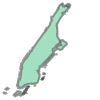

In [23]:
gdf.loc[1, 'geometry']

In [24]:
shape = shapely.geometry.shape(gdf.loc[1, 'geometry'])


In [28]:
count_y = 0
count_n = 0

for index,row in df.iterrows():
    point = shapely.geometry.Point(row['lon'], row['lat'])
    if shape.contains(point):
        count_y += 1
    else:
        count_n +=1
print(count_y, count_n)

899 1259


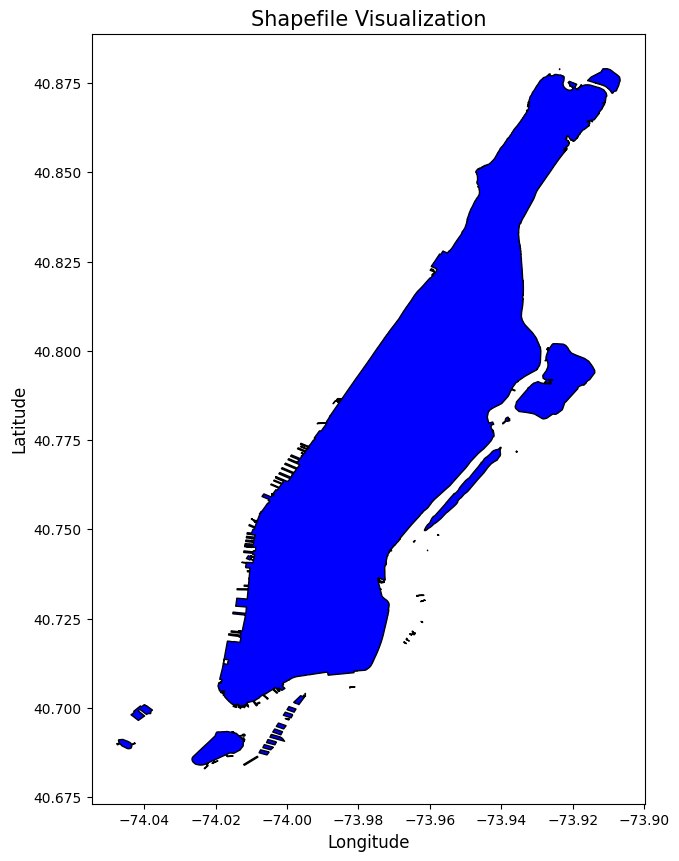

In [11]:

# Plot the geodataframe with customizations
fig, ax = plt.subplots(figsize=(10, 10))
gdf.loc[1:1].plot(ax=ax, color='blue', edgecolor='black')

# Add title and labels
ax.set_title("Shapefile Visualization", fontsize=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.show()